In [1]:
import pandas as pd
from sklearn.model_selection import RepeatedKFold, cross_val_score
from collections import Counter
from xgboost import XGBClassifier 

In [3]:
data_p = './data/new_clean.csv'
data = pd.read_csv(data_p)

In [2]:
data_p = './data/data_v1.xlsx'
data = pd.read_excel(data_p)

In [4]:
data.head()

,年龄,受教育年限,病程,HAME总分,UPDRSII总分,UPDRSIII总分,RBD总分,PDSS,中医老年颤证评分,SCOPAAUT评分,PDQ39总分,是否抑郁,编号,组别,姓名
0,71,7,19,2,8,9,3,119,6,6,6,0,20,2,成桂炎
1,88,11,18,1,3,15,1,144,6,7,6,0,29,2,阮祖成
2,60,11,19,0,2,18,1,148,7,0,2,0,31,2,吕祥林
3,66,9,20,10,3,9,0,145,7,0,5,0,46,2,马美云
4,65,16,19,0,4,19,6,122,6,5,5,0,56,1,GCMI


In [5]:
data['label'] = (data.是否抑郁 >0).astype(int)

In [9]:
data.groupby(['label']).size()

label
0    77
1    55
dtype: int64

In [23]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=100)

In [24]:
print(train.groupby(['label']).size())
train.head()

label
0    62
1    43
dtype: int64


,年龄,受教育年限,病程,HAME总分,UPDRSII总分,UPDRSIII总分,RBD总分,PDSS,中医老年颤证评分,SCOPAAUT评分,PDQ39总分,是否抑郁,编号,组别,姓名,label
37,76,11,32,5,3,8,6,116,4,4,8,0,120,1,朱秀琴,0
72,72,16,136,6,8,31,0,132,13,6,10,0,25,2,冯达礼,0
76,67,0,34,4,3,8,3,59,2,5,6,0,94,2,潘美爱,0
26,67,9,44,19,9,18,6,94,7,12,34,0,9,1,支宝娣,0
99,77,6,199,9,8,16,1,130,2,12,12,1,128,2,胡青芽,1


In [25]:
print(test.groupby(['label']).size())
test.head()

label
0    15
1    12
dtype: int64


,年龄,受教育年限,病程,HAME总分,UPDRSII总分,UPDRSIII总分,RBD总分,PDSS,中医老年颤证评分,SCOPAAUT评分,PDQ39总分,是否抑郁,编号,组别,姓名,label
28,67,0,43,4,6,20,2,138,5,4,9,0,,2,DIQH,0
131,67,7,76,46,14,15,12,90,7,19,87,2,77,2,顾建新,1
45,61,9,29,0,13,20,4,95,10,1,43,0,67,2,王小娟,0
73,69,7,15,10,8,12,0,146,6,2,6,0,41,2,杨素瑛,0
33,66,4,35,11,6,19,0,28,7,12,32,0,91,1,章秋梅,0


In [ ]:
train.iloc[:,-1]

37     0
72     0
76     0
26     0
99     1
      ..
87     1
103    1
67     0
24     0
8      0
Name: label, Length: 105, dtype: int64

In [ ]:
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = xgb.XGBModel(**param_dist)

clf.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        eval_metric='logloss',
        verbose=True)

evals_result = clf.evals_result()

In [32]:
param_dist = {'objective':'binary:logistic', 'n_estimators':2}

clf = XGBClassifier(**param_dist)

clf.fit(train.iloc[:,:11], train.iloc[:,-1],
        eval_set=[(train.iloc[:,:11], train.iloc[:,-1] ), (test.iloc[:,:11] ,  test.iloc[:,-1])],
        eval_metric='logloss',
        verbose=True)

evals_result = clf.evals_result()

[0]	validation_0-logloss:0.53118	validation_1-logloss:0.58385
[1]	validation_0-logloss:0.43623	validation_1-logloss:0.52666


In [38]:
clf.feature_importances_

array([0.02356129, 0.06048706, 0.03803789, 0.7304981 , 0.09771715,
       0.        , 0.        , 0.00476882, 0.04492973, 0.        ,
       0.        ], dtype=float32)

In [61]:
list(train.columns[:11])

['年龄',
 '受教育年限',
 '病程',
 'HAME总分',
 'UPDRSII总分',
 'UPDRSIII总分',
 'RBD总分',
 'PDSS',
 '中医老年颤证评分',
 'SCOPAAUT评分',
 'PDQ39总分']

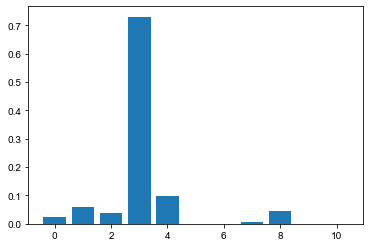

In [60]:
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()

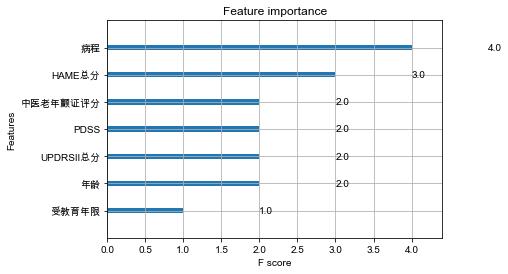

In [59]:
from xgboost import plot_importance
from matplotlib import pyplot as plt
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']# 能显示中文
# plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
# plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

plot_importance(clf)
plt.show()

In [46]:
sorted(list(zip(list(train.columns[:11]),clf.feature_importances_)), key=lambda x:x[1], reverse=True)

[('HAME总分', 0.7304981),
 ('UPDRSII总分', 0.09771715),
 ('受教育年限', 0.06048706),
 ('中医老年颤证评分', 0.04492973),
 ('病程', 0.038037892),
 ('年龄', 0.023561293),
 ('PDSS', 0.004768821),
 ('UPDRSIII总分', 0.0),
 ('RBD总分', 0.0),
 ('SCOPAAUT评分', 0.0),
 ('PDQ39总分', 0.0)]

/Users/dgm1sgh/.conda/envs/data_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


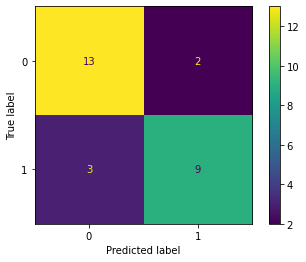

In [36]:
import sklearn

sklearn.metrics.plot_confusion_matrix(clf, test.iloc[:,:11] ,  test.iloc[:,-1])

/Users/dgm1sgh/.conda/envs/data_analysis/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


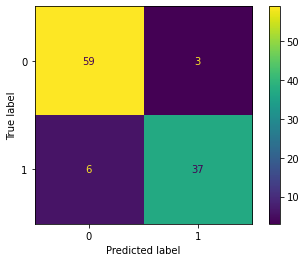

In [37]:
sklearn.metrics.plot_confusion_matrix(clf, train.iloc[:,:11] ,  train.iloc[:,-1])